<H1>INFOSYS SPRINGBOARD - BREAST CANCER DETECTION USING ADABOOST CLASSIFIER PROJECT</H1>
<H4>Installing the necesssary libraries</H4>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

<h2>DATA PREPROCESSING</h2>

<h3>Data Collection</h3><h4>Reading the CSV file and naming the Columns</h4>

In [4]:
# Load dataset
columns = ['ID', 'Diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
    'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
    'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
data = pd.read_csv(r"C:\Users\91949\OneDrive\Desktop\infosys intern\breast+cancer+wisconsin+diagnostic\wdbc.data", header=None, names=columns)


<h4><b>head()</b> is used to display the top 5 rows in the datasets</h4>

In [5]:
data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h4><b>tail()</b> is used to display the bottom 5 rows in the dataset</h4>

In [6]:
data.tail()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


<h3>Removing ID Column</h3>

In [7]:
data=data.drop("ID",axis=1)

<h3>ENCODING CATEGORICAL LABELS</h3>

In [8]:
# Preprocessing
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

<h4>Shape of dataset</h4>

In [9]:
data.shape

(569, 31)

<h4>Summary of Dataset</h4>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<h3>Checking Null values

In [11]:
data.isnull().sum()

Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<h3>Checking Unique values

In [12]:
unique_columns=data.nunique()
print(unique_columns)

Diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64


<h2>Data visualization

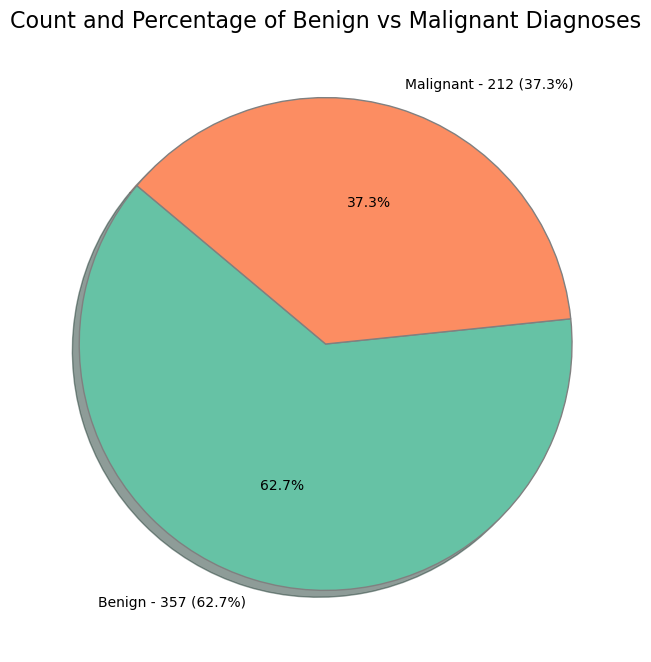

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
datar=data.copy()
# Map 1 to "Malignant" and 0 to "Benign"
datar['Diagnosis'] = datar['Diagnosis'].map({1: 'Malignant', 0: 'Benign'})

# Calculate counts and prepare labels with counts and percentages
counts = datar['Diagnosis'].value_counts()
labels = [f'{label} - {count} ({count / sum(counts) * 100:.1f}%)' for label, count in zip(counts.index, counts)]

# Use a color palette for distinct colors
colors = sns.color_palette("Set2", len(counts))

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',       # Show percentage on each slice
    startangle=140,          # Rotate for better readability
    colors=colors,           # Apply color palette
    wedgeprops={'edgecolor': 'gray'},  # Edge around slices
    shadow=True              # Add shadow for 3D effect
)

plt.title("Count and Percentage of Benign vs Malignant Diagnoses", fontsize=16)
plt.show()

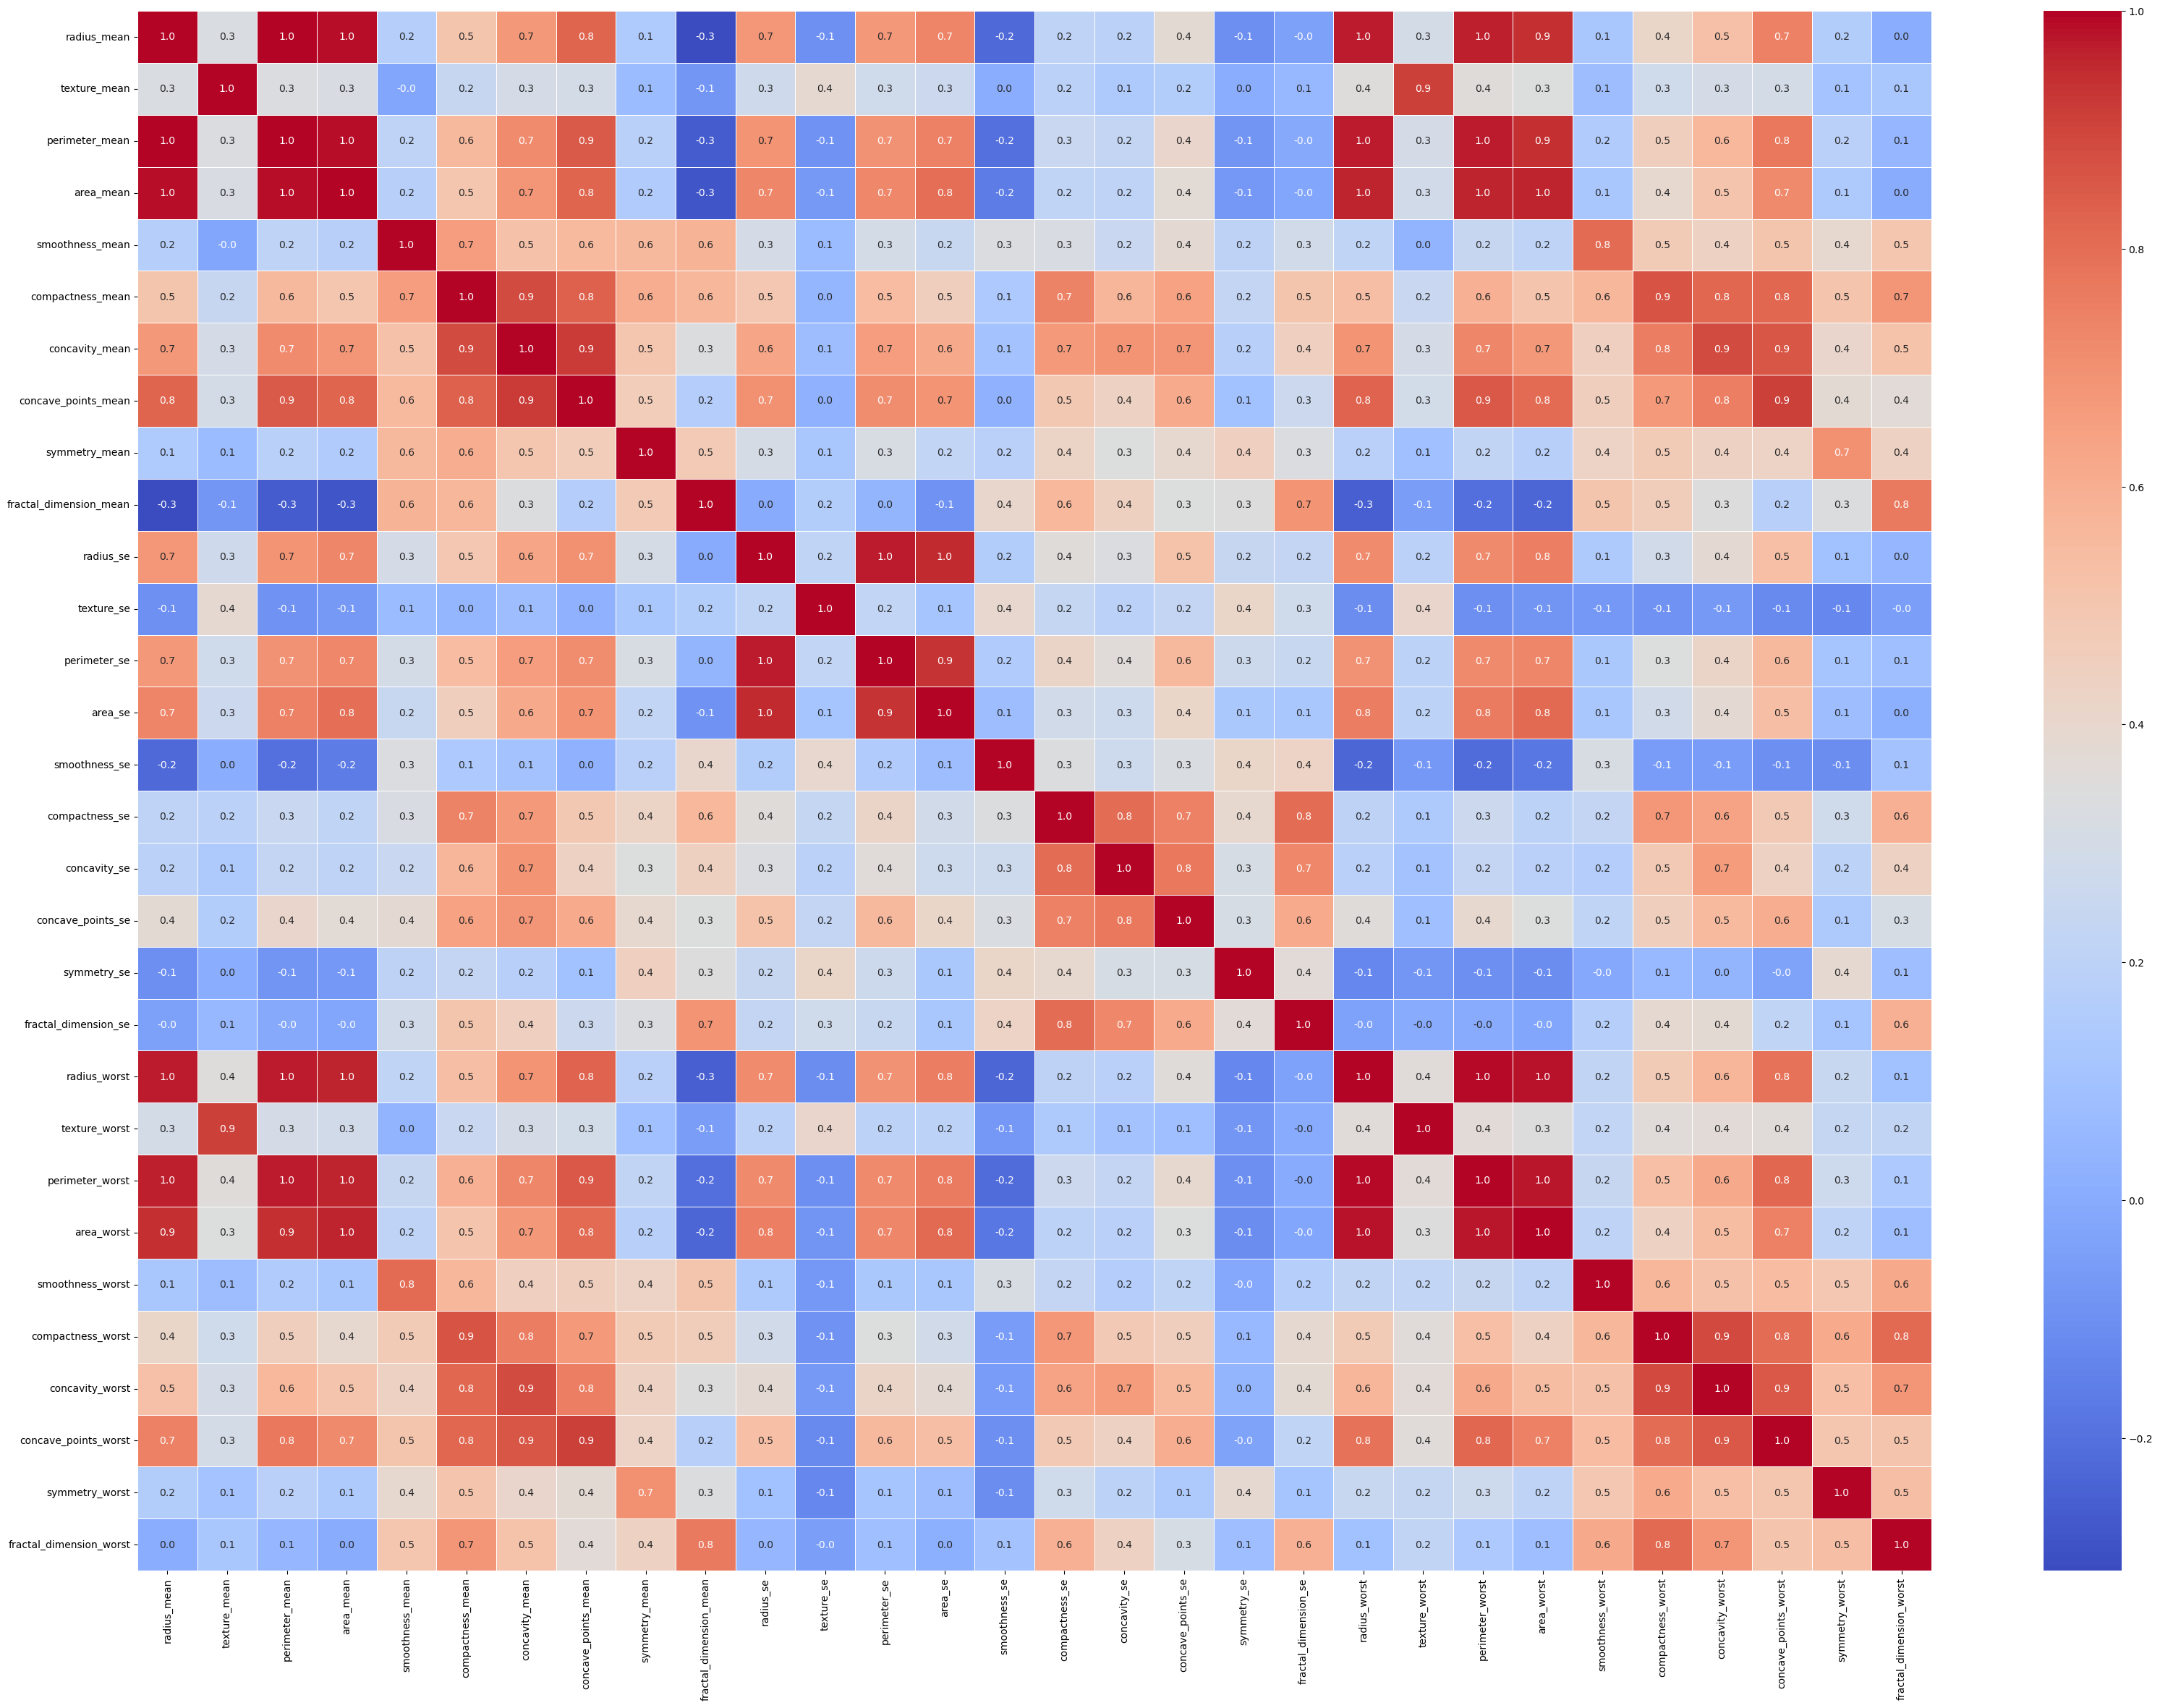

In [14]:
plt.figure(figsize=(40, 28))

# Generate the heatmap for correlation matrix with annotations
sns.heatmap(data.drop('Diagnosis',axis=1).corr(), annot=True, cmap='coolwarm', fmt='.01f', linewidths=0.5)

# Show the plot
plt.show()

<h3>Outlier Detection

In [15]:
outlier_percentages = {}
total_outliers = 0  # To track the total number of outliers

for feature in data.columns:
    # Calculate Q1, Q3, and IQR
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    # Calculate the percentage of outliers for this feature
    outlier_percentage = (len(outliers) / len(data)) * 100
    outlier_percentages[feature] = outlier_percentage

    # Count the total number of outliers
    total_outliers += len(outliers)

    # Print the details
    print(f'Feature: {feature}')
    print(f'Number of outliers: {len(outliers)}')
    print(f'Percentage of outliers: {outlier_percentage:.2f}%\n')

Feature: Diagnosis
Number of outliers: 0
Percentage of outliers: 0.00%

Feature: radius_mean
Number of outliers: 14
Percentage of outliers: 2.46%

Feature: texture_mean
Number of outliers: 7
Percentage of outliers: 1.23%

Feature: perimeter_mean
Number of outliers: 13
Percentage of outliers: 2.28%

Feature: area_mean
Number of outliers: 25
Percentage of outliers: 4.39%

Feature: smoothness_mean
Number of outliers: 6
Percentage of outliers: 1.05%

Feature: compactness_mean
Number of outliers: 16
Percentage of outliers: 2.81%

Feature: concavity_mean
Number of outliers: 18
Percentage of outliers: 3.16%

Feature: concave_points_mean
Number of outliers: 10
Percentage of outliers: 1.76%

Feature: symmetry_mean
Number of outliers: 15
Percentage of outliers: 2.64%

Feature: fractal_dimension_mean
Number of outliers: 15
Percentage of outliers: 2.64%

Feature: radius_se
Number of outliers: 38
Percentage of outliers: 6.68%

Feature: texture_se
Number of outliers: 20
Percentage of outliers: 3.51%

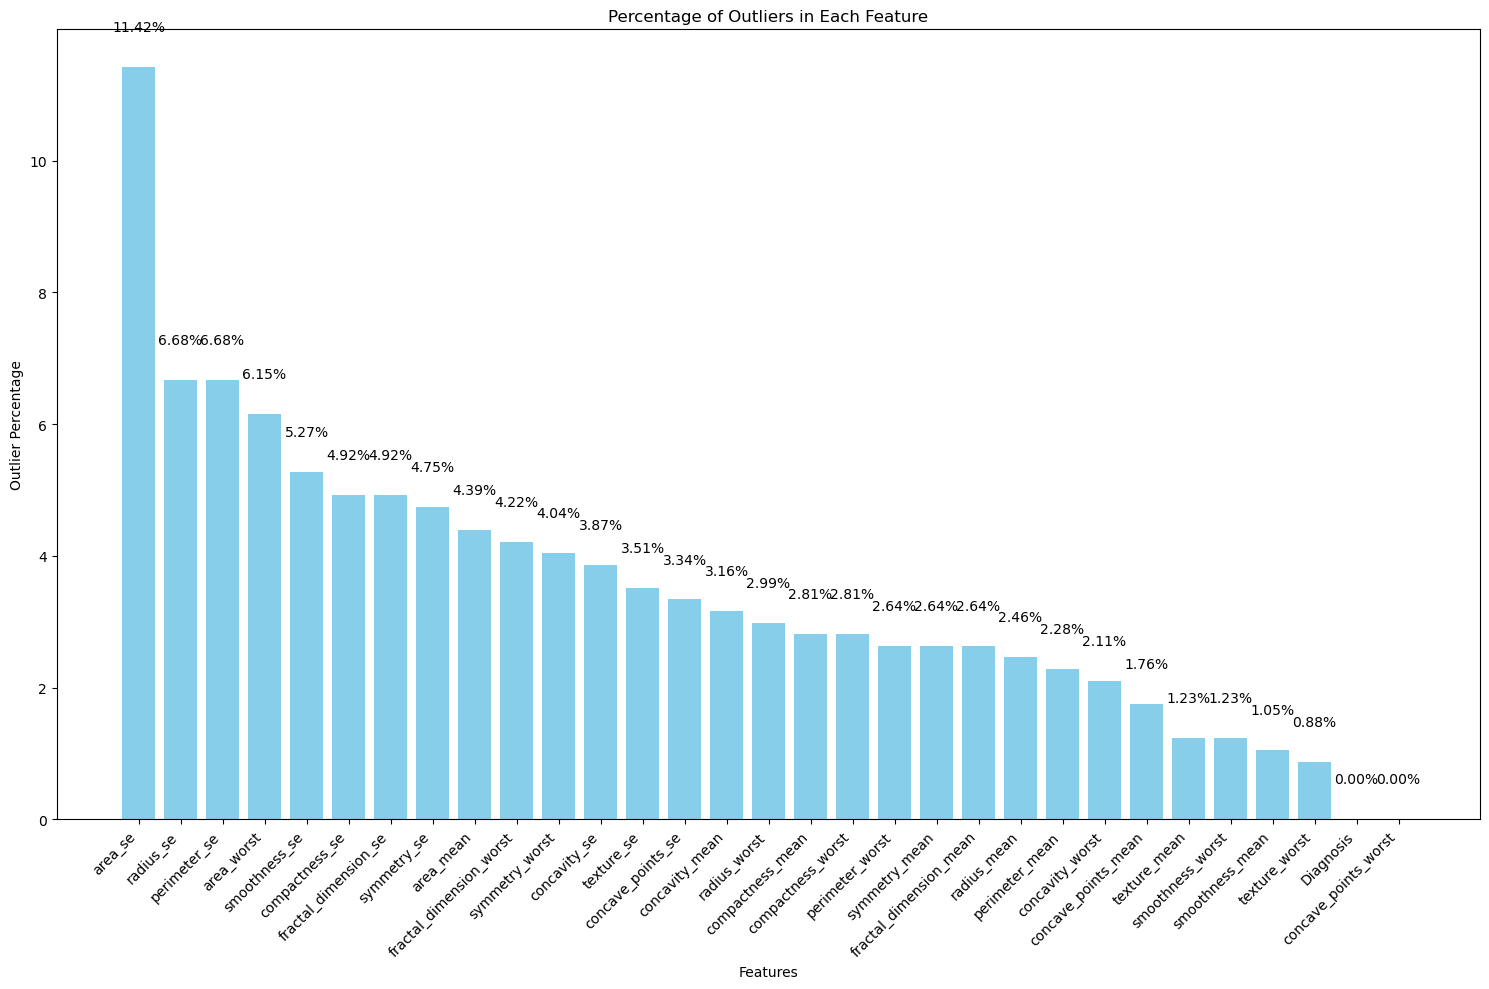

In [16]:
total_outlier_percentage = (total_outliers / (len(data) * len(data.columns))) * 100

# Convert outlier percentages to a DataFrame for visualization
outlier_percentage_df = pd.DataFrame({
    'Feature': list(outlier_percentages.keys()),
    'Outlier_Percentage': list(outlier_percentages.values())
}).sort_values(by='Outlier_Percentage', ascending=False)

# Step 3: Plot individual feature outlier percentages
plt.figure(figsize=(15, 10))
plt.bar(outlier_percentage_df['Feature'], outlier_percentage_df['Outlier_Percentage'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Outlier Percentage')
plt.title('Percentage of Outliers in Each Feature')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Annotate the bars with percentages
for i, value in enumerate(outlier_percentage_df['Outlier_Percentage']):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center', va='bottom', fontsize=10, color='black')

plt.show()

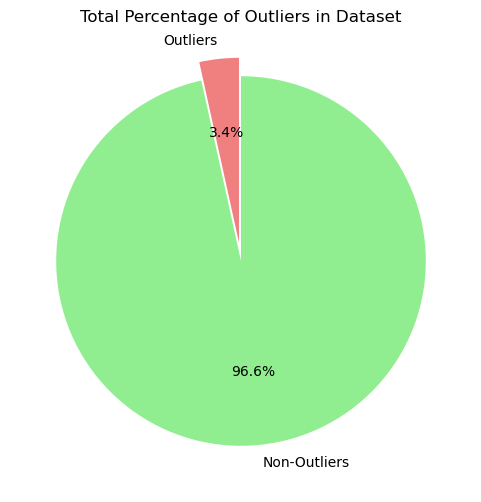

In [17]:
plt.figure(figsize=(6, 6))
labels = ['Outliers', 'Non-Outliers']
sizes = [total_outlier_percentage, 100 - total_outlier_percentage]
colors = ['lightcoral', 'lightgreen']
explode = (0.1, 0)  # Slightly explode the 'Outliers' slice

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Total Percentage of Outliers in Dataset')
plt.show()

<h3>Scaling the Data

In [18]:
scaler = StandardScaler()
# Scale the original features
X_original_scaled = scaler.fit_transform(X)

<h2>Splitting the Dataset

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_original_scaled, y, test_size=0.3, random_state=42)

<h3>Applying SMOTE</h3>

In [20]:
# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<h2>Implementation of Adaboost Classifer

In [21]:
# Initialize AdaBoost
base_estimator=DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

In [22]:
# Train AdaBoost (without hyperparameter tuning)
ada_boost.fit(X_train_smote, y_train_smote)
y_pred = ada_boost.predict(X_test)

C:\Users\91949\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [23]:
# Classification report (without tuning)
print("Classification Report (without hyperparameter tuning):\n")
print(classification_report(y_test, y_pred))

Classification Report (without hyperparameter tuning):

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



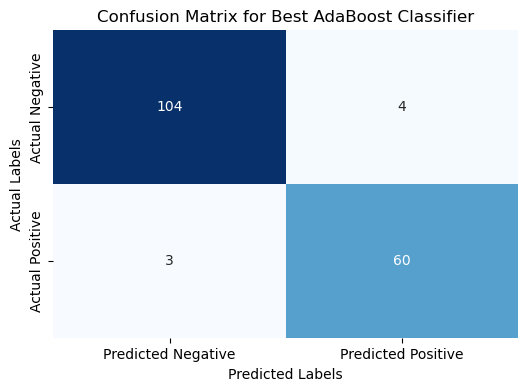

In [24]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix for Best AdaBoost Classifier")

<h2>Hyperparameter Tuning</h2>

In [25]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

In [26]:
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

C:\Users\91949\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring='recall')

In [27]:
# Get the best model from GridSearchCV

best_adaboost = grid_search.best_estimator_
 
# Print the best parameters found by GridSearchCV

print(f"Best parameters found: {grid_search.best_params_}")
 
# Evaluate the best model on the test set

y_pred = best_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

Best parameters found: {'learning_rate': 0.1, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.94      0.98      0.96        63

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



<h2>ROC Curve</h2>

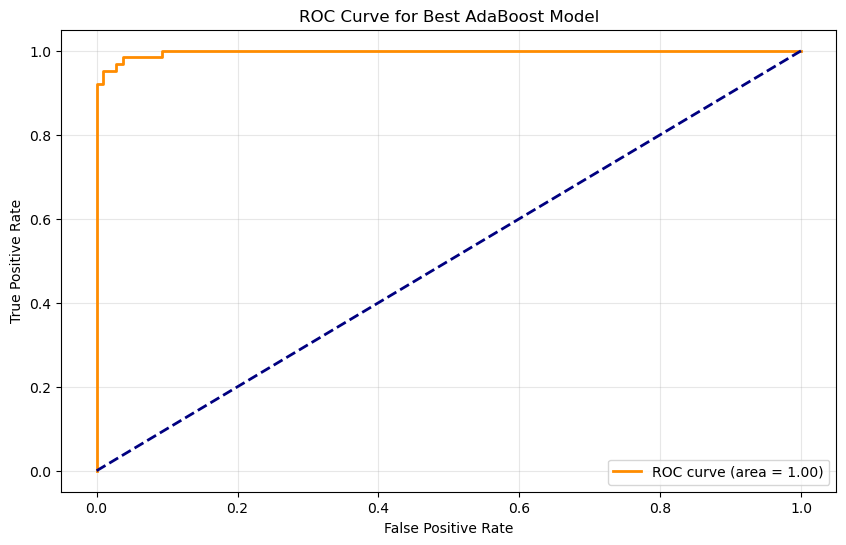

In [28]:
y_pred_proba = best_adaboost.predict_proba(X_test)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])  # For binary classification, use column 1 for positive class
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best AdaBoost Model')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

<h2>Visualizing Feature Importances in a Fine-Tuned AdaBoost Model</h2>

In [29]:
# Get the feature importances from the trained AdaBoost model
importances = best_adaboost.feature_importances_ 
# Create a DataFrame to hold the feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances

})

In [30]:
# Get the feature importances from the trained AdaBoost model
importances = best_adaboost.feature_importances_
# Create a DataFrame to hold the feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

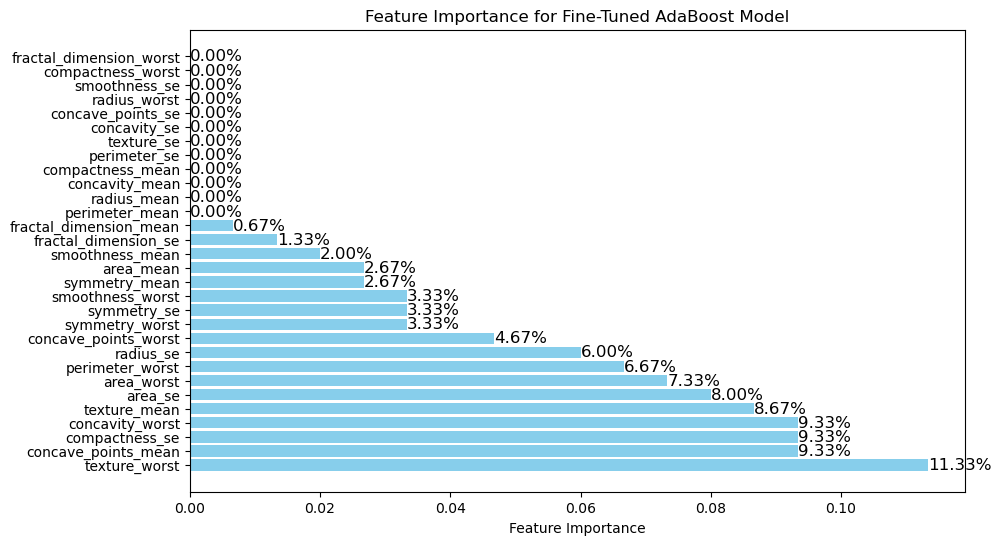

In [31]:
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Fine-Tuned AdaBoost Model')
# Annotate the bars with percentage values
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value*100:.2f}%', va='center', color='black', fontsize=12) 
# Show the plot
plt.show()

<h3>Visualizing and Selecting Significant Features for AdaBoost Model</h3>

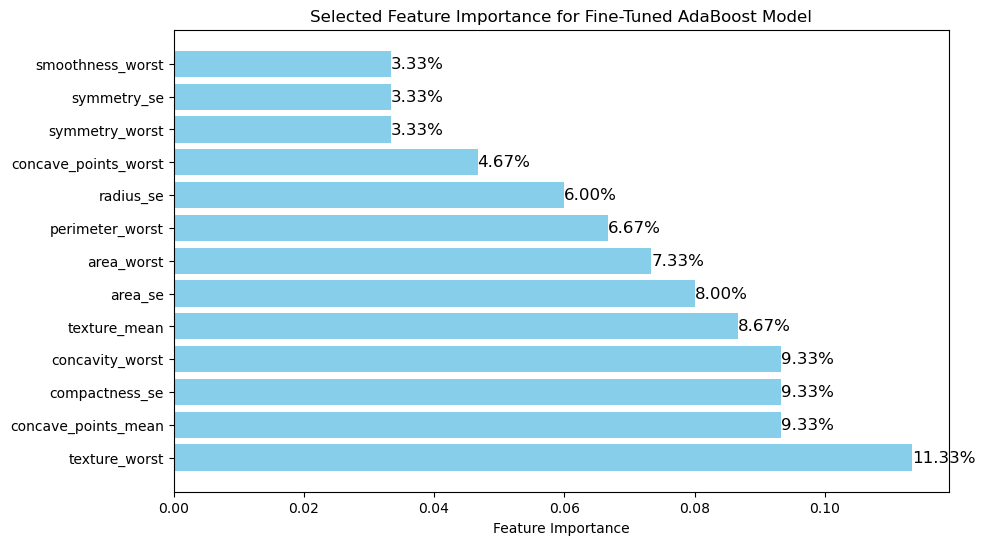

Selected Features for Model Building:
['texture_worst', 'concave_points_mean', 'compactness_se', 'concavity_worst', 'texture_mean', 'area_se', 'area_worst', 'perimeter_worst', 'radius_se', 'concave_points_worst', 'symmetry_worst', 'symmetry_se', 'smoothness_worst']


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume feature_importance_df is already defined and contains columns 'Feature' and 'Importance'

# Filter features with importance greater than 3% (0.03 in decimal)
selected_features = feature_importance_df[feature_importance_df['Importance'] >= 0.03]

# Sort the DataFrame by importance in descending order
selected_features = selected_features.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(selected_features['Feature'], selected_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Selected Feature Importance for Fine-Tuned AdaBoost Model')

# Annotate the bars with percentage values
for index, value in enumerate(selected_features['Importance']):
    plt.text(value, index, f'{value*100:.2f}%', va='center', color='black', fontsize=12)

# Show the plot
plt.show()

# Print selected features (optional)
print("Selected Features for Model Building:")
print(selected_features['Feature'].tolist())


### Re-train Adaboost for selected model

In [33]:
selected_features=['Diagnosis','texture_worst', 'compactness_se', 'concavity_worst', 'concave_points_mean', 'texture_mean', 'area_se', 'area_worst', 'perimeter_worst', 'radius_se', 'concave_points_worst', 'smoothness_worst', 'symmetry_worst', 'symmetry_se']

In [34]:
data_selected = data[selected_features]

In [35]:
data_selected.head()

,Diagnosis,texture_worst,compactness_se,concavity_worst,concave_points_mean,texture_mean,area_se,area_worst,perimeter_worst,radius_se,concave_points_worst,smoothness_worst,symmetry_worst,symmetry_se
0,1,17.33,0.04904,0.7119,0.14710,10.38,153.40,2019.0,184.60,1.0950,0.2654,0.1622,0.4601,0.03003
1,1,23.41,0.01308,0.2416,0.07017,17.77,74.08,1956.0,158.80,0.5435,0.1860,0.1238,0.2750,0.01389
2,1,25.53,0.04006,0.4504,0.12790,21.25,94.03,1709.0,152.50,0.7456,0.2430,0.1444,0.3613,0.02250
3,1,26.50,0.07458,0.6869,0.10520,20.38,27.23,567.7,98.87,0.4956,0.2575,0.2098,0.6638,0.05963
4,1,16.67,0.02461,0.4000,0.10430,14.34,94.44,1575.0,152.20,0.7572,0.1625,0.1374,0.2364,0.01756


<h4>Separating Features and Target Variable for Model Training</h4>

In [36]:
x_select = data_selected.drop(columns=['Diagnosis'])
y_select = data_selected['Diagnosis']

<h4>Standardizing Features Using StandardScaler</h4>

In [37]:
scaler = StandardScaler()
# Scale the original features
x_selected_scaled = scaler.fit_transform(x_select)

<h4>Splitting the data</h4>

In [38]:
# Train-test split
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(x_select, y_select, test_size=0.3, random_state=42)

<h4> Applying SMOTE for Class Balancing in Training Data</h4>

In [39]:
# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_smote_sel, y_train_smote_sel = smote.fit_resample(X_train_sel, y_train_sel)

<h4>Training AdaBoost Model and Making Predictions</h4>

In [40]:
ada_boost.fit(X_train_smote_sel, y_train_smote_sel)
y_pred = ada_boost.predict(X_test_sel)

C:\Users\91949\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [41]:
# Classification report (without tuning)
print("Classification Report for selected features (without hyperparameter tuning):\n")
print(classification_report(y_test, y_pred))

Classification Report for selected features (without hyperparameter tuning):

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       108
           1       0.91      0.98      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



<h4>Hyperparameter Tuning and Evaluation of AdaBoost Model Using GridSearchCV</h4>

In [42]:
grid_search_Sel = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search_Sel.fit(X_train_smote_sel, y_train_smote_sel)

C:\Users\91949\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring='recall')

Best parameters found: {'learning_rate': 0.5, 'n_estimators': 150}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       108
           1       0.91      0.98      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



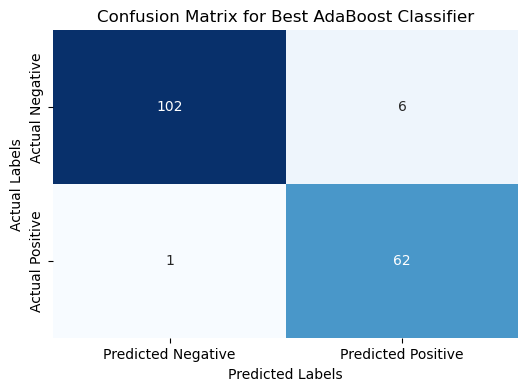

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Define the confusion matrix plotting function
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title(title)
    plt.show()

# Get the best model from GridSearchCV
best_adaboost_sel = grid_search_Sel.best_estimator_

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search_Sel.best_params_}")

# Evaluate the best model on the test set
y_pred_sel = best_adaboost_sel.predict(X_test_sel)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_sel, y_pred_sel))

# Plot the confusion matrix
plot_confusion_matrix(y_test_sel, y_pred_sel, title="Confusion Matrix for Best AdaBoost Classifier")


In [44]:
# Get the best model from GridSearchCV

best_adaboost_sel = grid_search_Sel.best_estimator_
 
# Print the best parameters found by GridSearchCV

print(f"Best parameters found: {grid_search_Sel.best_params_}")
 
# Evaluate the best model on the test set

y_pred_sel = best_adaboost_sel.predict(X_test_sel)

print(classification_report(y_test, y_pred))

Best parameters found: {'learning_rate': 0.5, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       108
           1       0.91      0.98      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



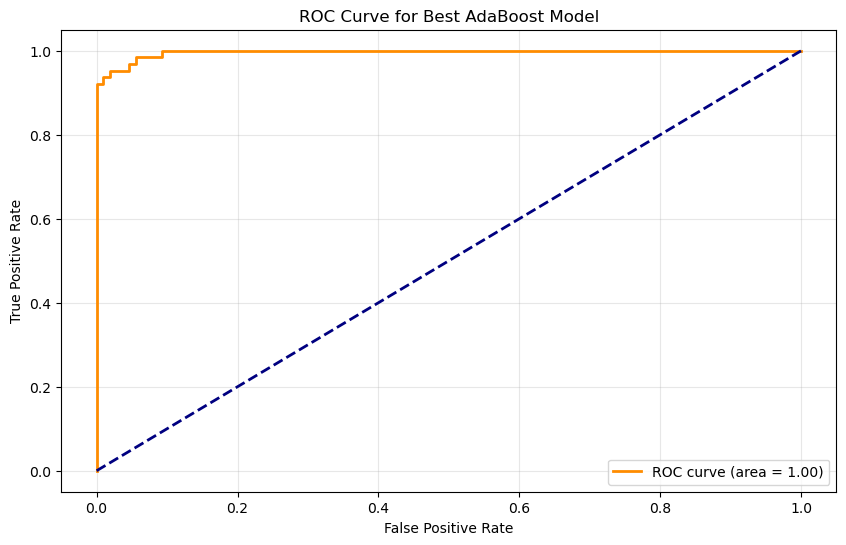

In [45]:
y_pred_proba_sel = best_adaboost_sel.predict_proba(X_test_sel)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_sel, y_pred_proba_sel[:, 1])  # For binary classification, use column 1 for positive class
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best AdaBoost Model')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

<h2>Saving the Model for depolyment

In [46]:
import pickle

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Change 'binary' to 'micro', 'macro' or 'weighted' as needed
f1 = f1_score(y_test, y_pred, average='binary')

filename = 'best_model.sav'
model_data = {
    'scaler': scaler,
    'model': best_adaboost_sel,
    'metrics': {
        'accuracy': accuracy,
        'precision': precision,
        'f1_score': f1
    }
}

# 4. Save the dictionary to a file
pickle.dump(model_data, open(filename, 'wb'))
print(f"Model, scaler, and metrics saved to {filename}")


Model, scaler, and metrics saved to best_model.sav
